<a href="https://colab.research.google.com/github/serinryu/AIDeepLearning-study/blob/main/CNN_based_Handwriting_Recognition/CNN_based_Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN 신경망** 

: 이미지 학습에 주로 사용되는 CNN(컨볼루션 신경망) 을 불러오고, 모델 레이어를 교체하는 방법을 알아봅니다.

---

> ### ✏️ problem definition
Handwriting recognition (classify image labels with 10 classes)
손글씨가 어떤 숫자인지 분류하는 모델을 만들 것


> ### ✏️ solution design
1. input
  - handwritten numerical images provided by the MNIST dataset (mnist_train.csv)
2. pre-processing
  - split train/test set
  - normalization
3. CNN modeling
  - Conv&Pooling layer (# layer : 2)
  - Fully connected layer (# layer : 1)
  - softmax activation
  - loss function: cross entropy
4. output
  - predicted label size:10
5. evaluation
  - accuracy graph
  - loss graph
6. analysis
  - confusion matrix


  > ### ✏️ Implementation using Keras
  - CNN modeling
    - Sequential(): Model that linear stack of layers
    - Conv2D(): 2D Convolutional NN layer
    - MaxPooling2D(): Max pooling operation for spatial data
    - Activation(): Activation layer
    - Dense(): Fully connected NN layer
    - Flatten(): Flattens the input. Does not affect the batch size
    - compile(): Configures the model for training
  - Training and evaluating
    - fit(): Train and verify the model with the given parameters
    - predict(): Returns the predicted value of the model for the test data

# 1. Load Dataset

In [ ]:
import pandas as pd

In [ ]:
mnist_csv = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/인공지능(2022-1)/data/mnist_train.csv', header=None, skiprows=1).values

In [ ]:
mnist_csv

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

#2. Pre-processing

### 2.1 Divide the dataset into training and test sets

In [ ]:
#train_test_split : sklearn.model_selection 내부에 있는 함수. Randomly split the dataset to training and test datasets
from sklearn.model_selection import train_test_split
train, test = train_test_split(mnist_csv , test_size =0.3, random_state=1) #무작위 30%는 test로, 나머지 70%는 train(학습용)데이터로 할당

In [ ]:
#확인
train

array([[2, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
test

array([[3, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

In [ ]:
train.shape

(42000, 785)

In [ ]:
test.shape

(18000, 785)

### 2.2 Convert label values to one-hot vectors

In [ ]:
#다차원 배열일 때는 콤마(comma ,)를 사용하여 접근할 수 있다. : array[행,열]
#to_categorical : Convert the label values to one hot vectors. 즉, Converts a class vector (integers) to a binary class matrix (ex. In MNIST : [4] -> [0,0,0,0,1,0,0,0,0])
from tensorflow.keras import utils
Y_train , X_train = utils.to_categorical(train[:,0]), train[:,1:] #Y_train에는 전체 행의 0번째열만 들어가고, X_train에는 전체 행의 1번째행부터 끝까지 들어간다. 
Y_test , X_test = utils.to_categorical(test[:,0]), test[:,1:]
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(42000, 784) (42000, 10)
(18000, 784) (18000, 10)


In [ ]:
#확인
train[:,0] #전체 행의 0번째열

array([2, 7, 6, ..., 0, 9, 0])

In [ ]:
utils.to_categorical(train[:,0]) #이러한 형태로 바꿔주는 것을 one hot enconding 이라고 한다.

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test[:,0] #전체 행의 0번째열

array([3, 2, 7, ..., 3, 9, 2])

In [ ]:
utils.to_categorical(test[:,0]) 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

### 2.3 Normalization : Convert values to be between 0 and 1

X_train[0] 을 찍어보면 0부터 255까지 범위가 너무 큰 것을 확인할 수 있다. 범위가 너무 크면 모델이 제대로 학습을 못하기 때문에 정규화를 해줄 필요가 있다.

In [ ]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,
       125, 125, 245, 255, 254, 255, 255, 254, 221,  96,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 125, 253, 253, 205, 135, 135, 135, 172, 253, 253, 252, 154,
        36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 125, 253,  23,   7,   0,   0,   0,   4,  1

In [ ]:
X_train_norm = (X_train)/255  #pixcel 데이터이므로 0부터 255까지의 값만 갖는다. 따라서 255를 나눠주면 된다.
X_test_norm = (X_test)/255 
print(Y_train[0])
print(X_train_norm[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

### 2.4 Visualization : Convert normalized vector to image

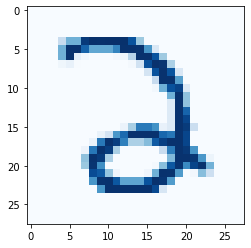

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.imshow( np.reshape(X_train_norm[0], (28, 28)) , cmap=plt.cm.Blues) #np.reshape로 X_train_norm[0] 을 28X28 2차원 배열로 reshape 

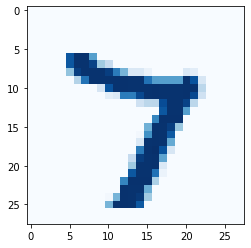

In [ ]:
plt.imshow( np.reshape(X_train_norm[1], (28, 28)) , cmap=plt.cm.Blues)

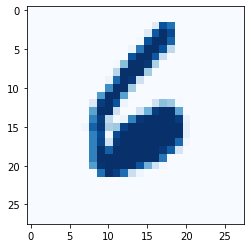

In [ ]:
plt.imshow( np.reshape(X_train_norm[2], (28, 28)) , cmap=plt.cm.Blues)

2.4 Visualization : Convert normalized vector to 36 images

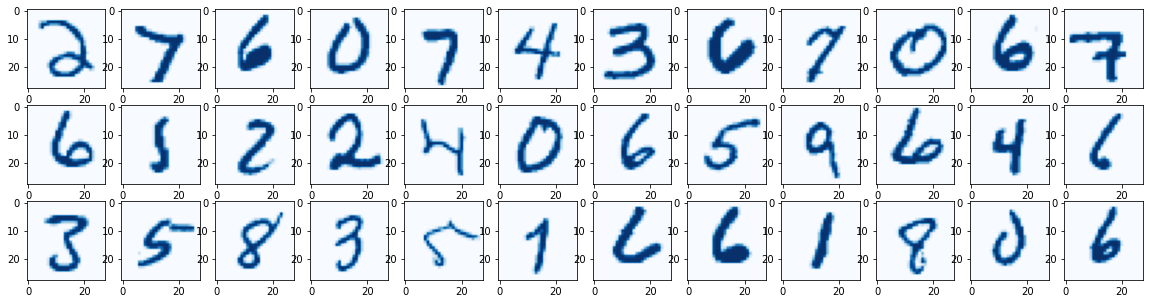

In [ ]:
%matplotlib inline
def plot_images(X_train):
    fig = plt.figure(figsize=(20,5))
    for i in range(36):
        ax = fig.add_subplot(3,12, i+1)
        plt.imshow(np.reshape(X_train_norm[i], (28, 28)), cmap=plt.cm.Blues)
plot_images(X_train_norm)

#3. CNN Modeling 

In [ ]:
#Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape


### 3.1 Build MLP structure (모델 구성)

Task: Build convolution layers of the CNN model as feature extractor

In [ ]:
#Build 4 Convolution pooling layers
model_cnn= Sequential()
model_cnn.add(Reshape((28, 28,1), input_shape=(X_train_norm.shape[1],)))
model_cnn.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model_cnn.add(MaxPool2D((2,2)))

Task: Build fully connected of the CNN model as feature extractor

In [ ]:
#Build 2 fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

### 3.2 Compile the model

In [ ]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f3767592a50>>

# Model Checkpoint

- `모델 구성`과 `컴파일`까지 마치면 모델 구축이 모두 완료된 것이고, 다음 단계인 학습으로 넘어가면 된다.


- 학습 하기 전: 학습 하기에 앞서서, colab 사용시 모델 학습 중 끊어질 경우 학습된 모델의 weight 손실 가능성이 존재하기 때문에 모델 학습 시에 checkpoint 설정이 필요하다. 지금 이 checkpoint 를 설정해줄 것이다.

  - 모델의 validation 값이 best 일때마다 모델 weight 저장
  - Memory oveflow 나 crash가 나더라도 다시 weight를 불러와서 학습 진행

In [ ]:
from keras.callbacks import ModelCheckpoint

EPOCH = 100  #학습하는 횟수
BATCH_SIZE = 256  #한번에 GPU 에 올라가는 데이터의 개수 (GPU 는 병렬연산이 가능하기 때문에 한번에 쫙 다 뿌리고 나중에 loss 를 계산해서 모델이 갱신되는 것)

filename = '/content/drive/MyDrive/Colab Notebooks/checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(EPOCH, BATCH_SIZE)  #이러한 file 을 나중에 만들어주세요
checkpoint = ModelCheckpoint(filename,              # file명을지정합니다
                              monitor='val_loss',   # val_loss값이개선되었을때호출됩니다
                              verbose=1,            # 로그를출력합니다
                              save_best_only=True,  # 가장best 값만저장합니다
                              mode='auto'           # auto는알아서best를찾습니다. min/max
)

# 4. Training and Evaluation

Task: Perform a batch gradient descent for a given epoch and batch size

In [ ]:
history = model_cnn.fit(X_train_norm,Y_train, batch_size=256, epochs=100,verbose=2, validation_data=(X_test_norm, Y_test))

Epoch 1/100
165/165 - 55s - loss: 0.1724 - accuracy: 0.9468 - val_loss: 0.3214 - val_accuracy: 0.8987 - 55s/epoch - 333ms/step
Epoch 2/100
165/165 - 50s - loss: 0.0930 - accuracy: 0.9709 - val_loss: 0.3738 - val_accuracy: 0.8967 - 50s/epoch - 300ms/step
Epoch 3/100
165/165 - 47s - loss: 0.0660 - accuracy: 0.9799 - val_loss: 0.0895 - val_accuracy: 0.9748 - 47s/epoch - 285ms/step
Epoch 4/100
165/165 - 45s - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0477 - val_accuracy: 0.9860 - 45s/epoch - 275ms/step
Epoch 5/100
165/165 - 45s - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0696 - val_accuracy: 0.9789 - 45s/epoch - 273ms/step
Epoch 6/100
165/165 - 46s - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0447 - val_accuracy: 0.9873 - 46s/epoch - 276ms/step
Epoch 7/100
165/165 - 47s - loss: 0.0260 - accuracy: 0.9913 - val_loss: 0.0706 - val_accuracy: 0.9801 - 47s/epoch - 288ms/step
Epoch 8/100
165/165 - 47s - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0428 - val_accuracy: 0.9872 - 47s/epo

In [ ]:
#Dictionary of training and evaluation history
print(history.history.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# 5. Evaluation using Loss Curve

- Task: Uses loss curve to evaluate generalization performance of model

- Loss curve : A graph of the loss history of each epoch

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

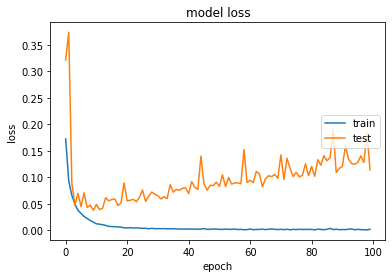

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()
#Analysis of result: train 데이터의 loss에 비해 test 데이터의 loss 가 낮아지지는 않으므로 간극이 발생했다. 이것을 overfitting 이라고 한다. 만약 test 와 training 의 loss curve 가 비슷했다면, Good generalization performance 

#모델이 에포크가 증가하면서 loss 가 감소한 것을 알 수 있다.
#test 데이터에서 삐죽삐죽 튀어나온 부분은 overfitting 되었다는 것이다. 심할 경우 에포크를 늘리거나, 모델을 수정해야 한다.

# 5. Evaluation using Accuracy Curve
- Task: Uses accuracy curve to evaluate generalization performance of model

- Accuracy curve : A graph of the accuracy history of each epoch

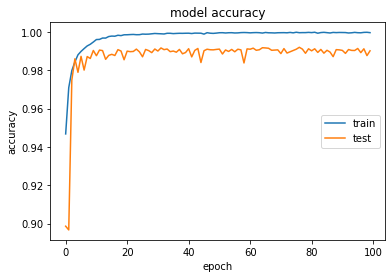

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

#Analysis of result: train 데이터의 accuracy에 비해 test 데이터의 accuracy 가 높아지지는 않으므로 간극이 발생했다. 이것을 overfitting 이라고 한다. 만약 test 와 training 의 accuracy curve 가 비슷했다면, Good generalization performance 

#Test accuracy reaches approximate 0.9900 (better than MLP). 즉, 성능향상을 위해 MLP -> CNN 변경 가능!
#모델이 에포크가 증가하면서 accuracy 가 증가한 것을 알 수 있다.
#test 데이터에서 삐죽삐죽 튀어나온 부분은 overfitting 되었다는 것이다. 심할 경우 에포크를 늘리거나, 모델을 수정해야 한다. (튜닝)

#6. Analysis using Confusion Matrix

- Task: Use a confusion matrix to analyze the error tendency of the model(to evaluate the accuracy of a classification)

- Confusion matrix
  - A specific table layout that allows visualization of the performance of an algorithm
  - Used to describe the performance of a classification model
  - 대각행렬로 구성되어 있는 것이 많으면 많을수록 좋은 모델이다.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(model_input, feature, label, class_info):
    pred = model_input.predict(feature) #model.predict(X_test): Returns the predicted value of the X_test data
    cnf_matrix= confusion_matrix(np.argmax(label, axis=1), np.argmax(pred, axis=1))
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    #Additions of information for visualization
    tick_marks= np.arange(len(class_info))
    plt.xticks(tick_marks, class_info, rotation=45)
    plt.yticks(tick_marks, class_info)
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j], horizontalalignment="center", color="white" if cnf_matrix[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    plt.show()


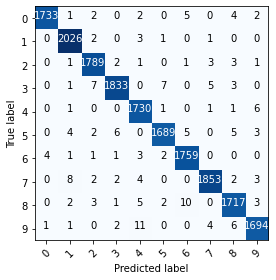

In [ ]:
label = list(range(10))
plot_confusion_matrix(model_cnn, X_test_norm, Y_test, class_info=label)
#대각행렬로 구성되어 있는 것이 많으면 많을수록 좋은 모델이다.
#실제 레이블은 0인데, 0으로 예측한 것은 1706개
#실제 레이블은 0인데, 1으로 예측한 것은 0개
#실제 레이블은 0인데, 2으로 예측한 것은 3개
#실제 레이블은 1인데, 1으로 예측한 것은 2001개

#MLP 보다 성능이 좋은 것을 확인할 수 있다. (성능향상)

- The data for ‘9’ were most confused with the data for ‘4’
- What are some improvements to distinguish between ‘3’ and ‘5’?
  - Train for more epochs
  - Deeper network
  - Change loss function, activation, or
  optimizer
  - etc.